<a href="https://colab.research.google.com/github/2303A510G8/AIML-2025_B16/blob/main/LAB-EXAM%202303a510G8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [4]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [7]:
y_pred_rf = rf.predict(X_test)

In [8]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 1.0000


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
y_pred_dt = dt.predict(X_test)

In [12]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

Decision Tree Accuracy: 1.0000


In [13]:
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

Random Forest Accuracy: 1.0000
Decision Tree Accuracy: 1.0000


In [14]:
feature_importance = rf.feature_importances_

In [15]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)


In [16]:
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


In [17]:
import matplotlib.pyplot as plt

In [18]:
oob_error = rf.oob_score_
print(f"OOB Score: {oob_error:.4f}")

OOB Score: 0.9429


In [19]:
oob_errors = []
for n_estimators in range(1, 201):
    rf_n = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=42)
    rf_n.fit(X_train, y_train)
    oob_errors.append(1 - rf_n.oob_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too fe

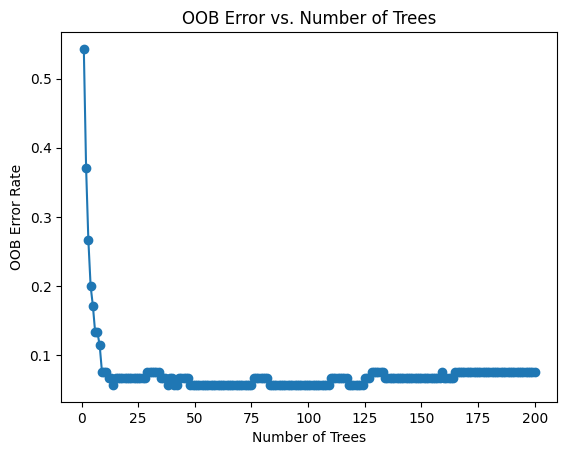

In [20]:
plt.plot(range(1, 201), oob_errors, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error vs. Number of Trees')
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [23]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

